Importing necessary libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

Our Project consists of two datasets - Purchase and Tender

Purchase dataset consists information about Product Purchase and Product Description

In [2]:
Purchase = pd.read_csv('cproducts.csv')

In [3]:
Purchase.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [4]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  11972 non-null  object 
 1   DOB                         11653 non-null  object 
 2   Gender                      10944 non-null  object 
 3   State                       10389 non-null  object 
 4   PinCode                     11155 non-null  float64
 5   transactionDate             11972 non-null  object 
 6   store_code                  11972 non-null  int64  
 7   store_description           11972 non-null  object 
 8   till_no                     11972 non-null  int64  
 9   transaction_number_by_till  11972 non-null  int64  
 10  promo_code                  11972 non-null  object 
 11  promotion_description       3462 non-null   object 
 12  product_code                11972 non-null  int64  
 13  product_description         119

In [5]:
Purchase.shape

(11972, 16)

In [8]:
Purchase.nunique()

customerID                    10410
DOB                            7026
Gender                            2
State                            37
PinCode                        1353
transactionDate                 790
store_code                        7
store_description                 7
till_no                          25
transaction_number_by_till    11127
promo_code                     2214
promotion_description          2010
product_code                   6000
product_description            5997
sale_price_after_promo         2945
discountUsed                     28
dtype: int64

In [9]:
Purchase.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

In [10]:
Purchase['sale_price_after_promo'].describe()

count    11972.000000
mean       147.014886
std        303.717711
min       -599.000000
25%         30.000000
50%         71.250000
75%        156.000000
max       8576.500000
Name: sale_price_after_promo, dtype: float64

Tender dataset consists information about various payment mode(s) opted by Customers 

In [11]:
Tender = pd.read_csv('ctender.csv')

In [12]:
Tender.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,9208,1000.00,GiftVoucher
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,9208,10.46,CASH
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,90269,677.28,AXIS
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90268,1042.00,One MobiKwik Systems
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90269,1000.00,One MobiKwik Systems


In [13]:
Tender.shape

(149752, 13)

In [14]:
Tender.nunique()

customerID                     9380
DOB                            6561
Gender                            2
State                            37
PinCode                        1219
transactionDate                 792
store_code                        7
store_description                 7
till_no                          25
tender_type                      45
transaction_number_by_till    69460
payment_amount_by_tender      74237
PaymentUsed                      33
dtype: int64

In [15]:
Tender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149752 entries, 0 to 149751
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customerID                  149752 non-null  object 
 1   DOB                         145156 non-null  object 
 2   Gender                      143089 non-null  object 
 3   State                       138102 non-null  object 
 4   PinCode                     144188 non-null  float64
 5   transactionDate             149752 non-null  object 
 6   store_code                  149752 non-null  int64  
 7   store_description           149752 non-null  object 
 8   till_no                     149752 non-null  int64  
 9   tender_type                 149752 non-null  object 
 10  transaction_number_by_till  149752 non-null  int64  
 11  payment_amount_by_tender    149752 non-null  float64
 12  PaymentUsed                 148529 non-null  object 
dtypes: float64(2),

In [16]:
Tender.isnull().sum()

customerID                        0
DOB                            4596
Gender                         6663
State                         11650
PinCode                        5564
transactionDate                   0
store_code                        0
store_description                 0
till_no                           0
tender_type                       0
transaction_number_by_till        0
payment_amount_by_tender          0
PaymentUsed                    1223
dtype: int64

In [17]:
Tender['payment_amount_by_tender'].describe()

count    149752.000000
mean       1515.504483
std        2032.301453
min      -28990.000000
25%         299.000000
50%         835.815000
75%        2004.000000
max       65635.400000
Name: payment_amount_by_tender, dtype: float64

In [18]:
Tender['customerID'].value_counts()

BBID_20453330     699
BBID_211419317    355
BBID_20444232     335
BBID_211414981    321
BBID_2043082      300
                 ... 
BBID_20440359       1
BBID_20440374       1
BBID_20440475       1
BBID_2114335        1
BBID_21148968       1
Name: customerID, Length: 9380, dtype: int64

In [19]:
Tender.groupby('customerID')['payment_amount_by_tender'].sum()

customerID
BBID_204100102    20820.32
BBID_204100150    17390.13
BBID_204100277    23573.19
BBID_204100310    19626.70
BBID_204100325     1060.01
                    ...   
BBID_21149949      2109.25
BBID_21149960      3606.33
BBID_21149962      5173.13
BBID_21149963     37918.54
BBID_21149985      8546.90
Name: payment_amount_by_tender, Length: 9380, dtype: float64

In [26]:
Tender['customerID'].nunique()

9380

Converting DOB in Datetime format

In [27]:
Purchase['DOB'] = pd.to_datetime(Purchase['DOB'],errors='coerce')
Tender['DOB'] = pd.to_datetime(Tender['DOB'],errors='coerce')
Purchase['transactionDate'] = pd.to_datetime(Purchase['transactionDate'])
Tender['transactionDate'] = pd.to_datetime(Tender['transactionDate'])

In [28]:
df = pd.merge(Tender,Purchase,on = ['customerID','transaction_number_by_till'],how = 'left')

In [29]:
df.shape

(149989, 27)

In [30]:
df.head()

,customerID,DOB_x,Gender_x,State_x,PinCode_x,transactionDate_x,store_code_x,store_description_x,till_no_x,tender_type,...,transactionDate_y,store_code_y,store_description_y,till_no_y,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing some duplicate columns

In [31]:
df.drop(['DOB_y', 'Gender_y', 'State_y', 'PinCode_y','transactionDate_y', 'store_code_y', 'store_description_y','till_no_y'],axis=1,inplace=True)

In [32]:
df.rename(columns={"sale_price_after_promo":"sale_price_after_discount"},inplace=True)

In [33]:
df.columns

Index(['customerID', 'DOB_x', 'Gender_x', 'State_x', 'PinCode_x',
       'transactionDate_x', 'store_code_x', 'store_description_x', 'till_no_x',
       'tender_type', 'transaction_number_by_till', 'payment_amount_by_tender',
       'PaymentUsed', 'promo_code', 'promotion_description', 'product_code',
       'product_description', 'sale_price_after_discount', 'discountUsed'],
      dtype='object')

In [34]:
df.shape

(149989, 19)

In [35]:
df.nunique()

customerID                     9380
DOB_x                          6560
Gender_x                          2
State_x                          37
PinCode_x                      1219
transactionDate_x               792
store_code_x                      7
store_description_x               7
till_no_x                        25
tender_type                      45
transaction_number_by_till    69460
payment_amount_by_tender      74237
PaymentUsed                      33
promo_code                     2069
promotion_description          1887
product_code                   5611
product_description            5607
sale_price_after_discount      2743
discountUsed                     26
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149989 entries, 0 to 149988
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customerID                  149989 non-null  object        
 1   DOB_x                       145344 non-null  datetime64[ns]
 2   Gender_x                    143308 non-null  object        
 3   State_x                     138317 non-null  object        
 4   PinCode_x                   144409 non-null  float64       
 5   transactionDate_x           149989 non-null  datetime64[ns]
 6   store_code_x                149989 non-null  int64         
 7   store_description_x         149989 non-null  object        
 8   till_no_x                   149989 non-null  int64         
 9   tender_type                 149989 non-null  object        
 10  transaction_number_by_till  149989 non-null  int64         
 11  payment_amount_by_tender    149989 non-

In [38]:
df.isnull().sum()

customerID                         0
DOB_x                           4645
Gender_x                        6681
State_x                        11672
PinCode_x                       5580
transactionDate_x                  0
store_code_x                       0
store_description_x                0
till_no_x                          0
tender_type                        0
transaction_number_by_till         0
payment_amount_by_tender           0
PaymentUsed                     1225
promo_code                    135519
promotion_description         145778
product_code                  135519
product_description           135519
sale_price_after_discount     135519
discountUsed                  135519
dtype: int64

In [21]:
df['State_x'].unique()

array([nan, 'MAHARASHTRA', 'MADHYA PRADESH', 'HARAYANA', 'TAMILNADU',
       'KARNATAKA', 'GUJARAT', 'ORISSA', 'JHARKHAND', 'TAMIL NADU',
       'CHATTISGARH', 'PUNJAB', 'WEST BENGAL', 'DELHI', 'UTTAR PRADESH',
       'HIMACHAL PRADESH', 'ANDHRA PRADESH', 'RAJASTHAN', 'DUMMY',
       'HARYANA', 'KERALA', 'SIKKIM', 'MADHYA  PRADESH', 'BIHAR', 'ASSAM',
       'MP', 'UTTARANCHAL', 'x', 'UTTAR PRADESH EAST', 'TRIPURA',
       'JAMMU AND KASHMIR', 'CHANDIGARH', 'CHHATTISGARH', 'KARNATAK',
       'GOA', 'Jharkhand', 'Other', 'MANIPUR'], dtype=object)

In [22]:
df['tender_type'].unique()

array(['GVOWN', 'CASH', 'EDCAXIS', 'MOBI', 'EDCSBI', 'EDCUTI', 'EDCICICI',
       'EDCUBI', 'PYOC', 'FUTP', 'CR-NOTE(I)', 'EDCHDFC', 'PATM', 'SPCD',
       'MVSODEXHO', 'SFOC', 'CSBK', 'CR-NOTE(R)', '5% Debit Card Disc',
       'GVSUPP', 'Less-VISA 5% Disc', 'CASH-CASHrency', 'PARKCOUP',
       'BFBB', 'EDCAMEX', 'BAJAJ FINANCE', 'CHEQUE',
       'CASH-CASHrencyDebitsu', 'Less-5% Axis Discnt',
       'CNIS-Credit Note Issu', 'SOMC', 'MVACCOR', 'Less -5% Axis Discnt',
       'AXISWEDBZR', 'FUTM', '5% Debit Card Discnt', 'PCLB',
       'FUTP - Oxigen Wallet', 'CCNREDEEM', 'BHIM', 'FOODCPN',
       'Cent CN Redeem', 'FGSC', 'CASH-CASHrencyDebitar', 'UBCC'],
      dtype=object)

Getting State column ready for exploration

In [23]:
df['State_x']=df['State_x'].replace('MADHYA  PRADESH','MADHYA PRADESH')
df['State_x']=df['State_x'].replace('MP','MADHYA PRADESH')
df['State_x']=df['State_x'].replace('HARAYANA','HARYANA')
df['State_x']=df['State_x'].replace('TAMILNADU','TAMIL NADU')
df['State_x']=df['State_x'].replace('KARNATAK','KARNATAKA')
df['State_x']=df['State_x'].replace('Jharkhand','JHARKHAND')
df['State_x']=df['State_x'].replace('CHATTISGARH','CHHATTISGARH')
df['State_x']=df['State_x'].replace('UTTAR PRADESH EAST','UTTAR PRADESH')
df['State_x']=df['State_x'].replace('x','Other')
df['State_x']=df['State_x'].replace('DUMMY','Other')
df['State_x']=df['State_x'].replace('other','Other')
df['State_x']=df['State_x'].fillna('Other')

Text(0.5, 0, 'State')

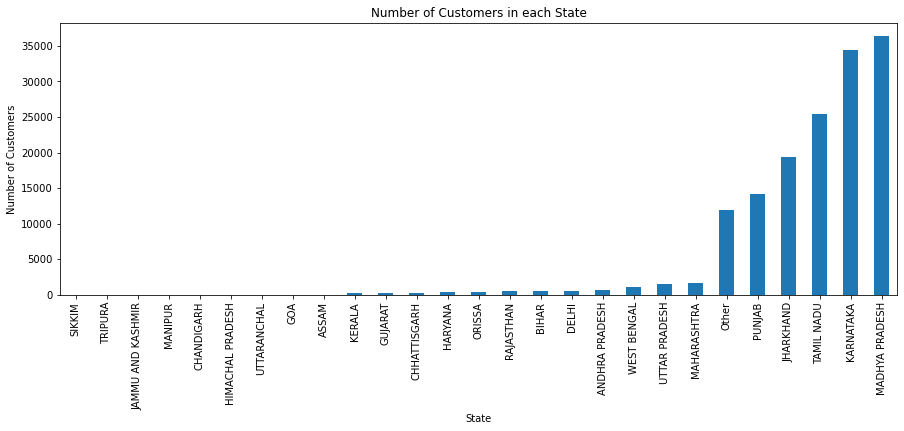

In [24]:
plt.figure(figsize=(15,5))
df['State_x'].value_counts().sort_values().plot.bar()
plt.title('Number of Customers in each State')
plt.ylabel('Number of Customers')
plt.xlabel('State')

1. The customers are dominantly from Madhya Pradesh and Karnataka

[Text(0, 0.5, 'Number of Purchases'),
 Text(0.5, 1.0, 'Number of Purchases by each Gender')]

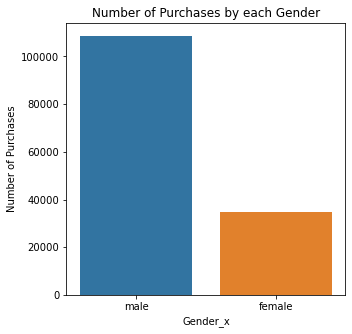

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender_x',data=df).set(ylabel='Number of Purchases',title='Number of Purchases by each Gender')

1. Most of the Purchases were made by Male customers (about 72%)

In [57]:
min(df['transactionDate_x']),max(df['transactionDate_x'])

(Timestamp('2015-05-01 00:00:00'), Timestamp('2017-06-30 00:00:00'))

In [26]:
df['PaymentUsed'].unique()

array(['GiftVoucher', 'CASH', 'AXIS', 'One MobiKwik Systems',
       'SBI CREDIT CARD', 'UTI', 'ICICI CREDIT CARD', 'UBI CREDIT CARD',
       'Payback', 'FuturePay', 'CREDIT NOTE (ISSUES)', 'HDFC CREDIT CARD',
       'PATM-PAYTM WALLET', 'Store Privilage Card', 'FoodCoupon',
       'SBI Youth Card', 'Cash Back', 'CreditNote', nan, 'SUPPLIER GV',
       'ParkingCoupon', 'BAJAJ FINSERVE', 'AMEX CREDIT CARD', 'CHEQUE',
       'SOMC', 'ACCOR MEAL VOUCHER', '5% Debit Card Discnt',
       'Future Money', 'BBProfitClub', 'CREDIT NOTE (RECEIPTS)',
       'BHIM-AXIS UPI', 'FOOD COUPON', 'FGShoppingFest', 'UBCC'],
      dtype=object)

Getting Payment Used column ready for exploration

In [27]:
df['PaymentUsed']=df['PaymentUsed'].replace('GiftVoucher','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('SBI CREDIT CARD','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('ICICI CREDIT CARD','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('HDFC CREDIT CARD','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('UBI CREDIT CARD','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('AMEX CREDIT CARD','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('SBI Youth Card','Credit Card')
df['PaymentUsed']=df['PaymentUsed'].replace('AXIS','Bank Transfer')
df['PaymentUsed']=df['PaymentUsed'].replace('UTI','Bank Transfer')
df['PaymentUsed']=df['PaymentUsed'].replace('BAJAJ FINSERVE','Bank Transfer')
df['PaymentUsed']=df['PaymentUsed'].replace('CHEQUE','Bank Transfer')
df['PaymentUsed']=df['PaymentUsed'].replace('One MobiKwik Systems','UPI')
df['PaymentUsed']=df['PaymentUsed'].replace('PATM-PAYTM WALLET','UPI')
df['PaymentUsed']=df['PaymentUsed'].replace('BHIM-AXIS UPI','UPI')
df['PaymentUsed']=df['PaymentUsed'].replace('FuturePay','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('Store Privilage Card','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('FoodCoupon','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('SUPPLIER GV','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('ParkingCoupon','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('ACCOR MEAL VOUCHER','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('Future Money','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('BBProfitClub','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('FOOD COUPON','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('Payback','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('Cash Back','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('FGShoppingFest','Voucher')
df['PaymentUsed']=df['PaymentUsed'].replace('CREDIT NOTE (ISSUES)','Others')
df['PaymentUsed']=df['PaymentUsed'].replace('CreditNote','Others')
df['PaymentUsed']=df['PaymentUsed'].replace('SOMC','Others')
df['PaymentUsed']=df['PaymentUsed'].replace('5% Debit Card Discnt','Others')
df['PaymentUsed']=df['PaymentUsed'].replace('CREDIT NOTE (RECEIPTS)','Others')
df['PaymentUsed']=df['PaymentUsed'].replace('UBCC','Others')
df['PaymentUsed']=df['PaymentUsed'].fillna('Others')

Text(0.5, 0, 'Payment Type')

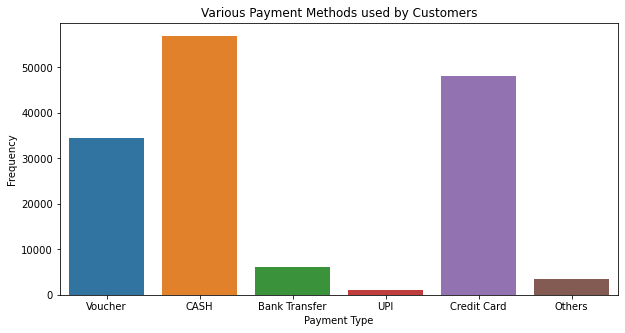

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'PaymentUsed',data=df)
plt.title('Various Payment Methods used by Customers')
plt.ylabel('Frequency')
plt.xlabel('Payment Type')

1. Most of the customers used Credit Card or Cash as a preferred mode of payment
2. Many customers also redeemed their Gift Vouchers as a mode of payment

In [29]:
from datetime import date,datetime
def Calculate_Age(Born):
    today = datetime(2017,12,31)
    return today.year-Born.year
df['Age'] = df['DOB_x'].apply(lambda x: Calculate_Age(x))

In [30]:
df['Age'].fillna(round(np.mean(df['Age']),0),inplace=True)
df['Age'] = df['Age'].astype(int)

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density distribution plot of Age of Customers')

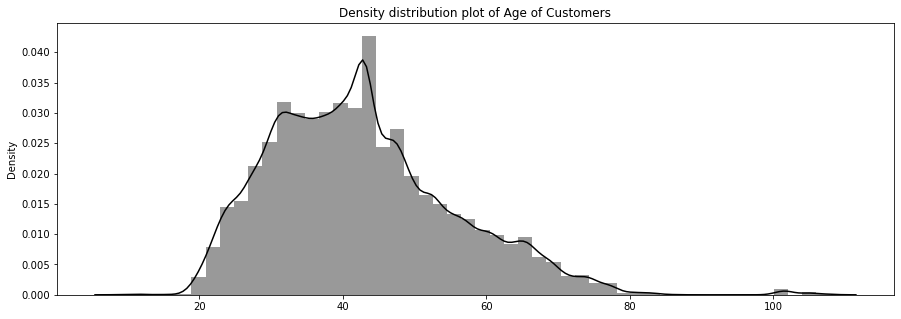

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(x=df['Age'],hist=True,color='black')
plt.title('Density distribution plot of Age of Customers')

Most of the customers are young; within the age group of 25-45. 

In [32]:
df['promo_code'].unique()

array([nan, 'NONPROMO', '0001206505', ..., '0001282881', '0001279705',
       'LOCALPROMO'], dtype=object)

Categorising the promo_code column into two heads

In [33]:
def PromoType(x):
    if x=='NONPROMO':
        return 'NONPROMO'
    else:
        return 'PROMO'
df['Promo_Type']= df['promo_code'].apply(PromoType)

[Text(0.5, 1.0, 'Number of Promos Used by Gender')]

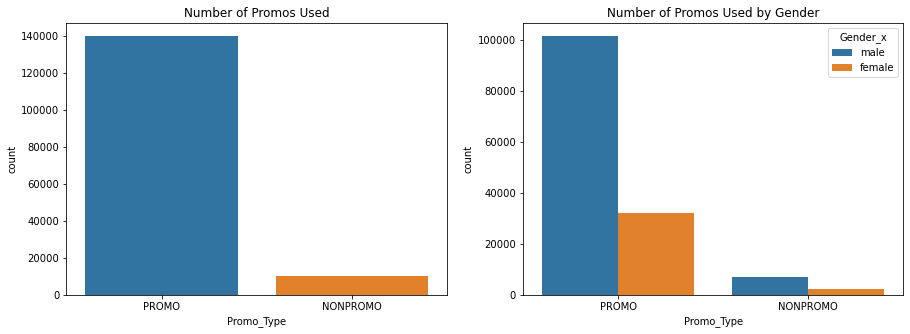

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Promo_Type',data=df).set(title='Number of Promos Used')
plt.subplot(1,2,2)
sns.countplot(x='Promo_Type',hue='Gender_x',data=df).set(title='Number of Promos Used by Gender')

1. Most Purchases (about 71%) were made without the use of a promo code.
2. 27% of male customers used a Promo code while 25% women customers availed a discount from promo code.

Arranging the Age intervals to understand the age distribution of our customers

In [38]:
Age_Interval=pd.cut(df['Age'],bins=5,precision=0).unique()
Age_IntervalCount=pd.cut(df['Age'],bins=5,precision=0).sort_values().value_counts()

In [39]:
Age_Interval.sort_values()

[(9.0, 29.0], (29.0, 49.0], (49.0, 68.0], (68.0, 88.0], (88.0, 108.0]]
Categories (5, interval[float64, right]): [(9.0, 29.0] < (29.0, 49.0] < (49.0, 68.0] < (68.0, 88.0] < (88.0, 108.0]]

In [40]:
Age_IntervalCount

(29.0, 49.0]     90004
(49.0, 68.0]     36069
(9.0, 29.0]      18547
(68.0, 88.0]      4910
(88.0, 108.0]      459
Name: Age, dtype: int64

[Text(0.5, 0, 'Age Intervals'), Text(0.5, 1.0, 'Age Groups of Customers')]

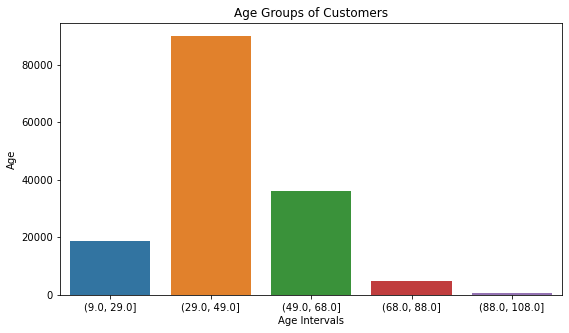

In [41]:
plt.figure(figsize=(9,5))
Age_graph=sns.barplot(x=Age_Interval,y=Age_IntervalCount)
Age_graph.set(xlabel='Age Intervals',title='Age Groups of Customers')

Maximum Customers are young

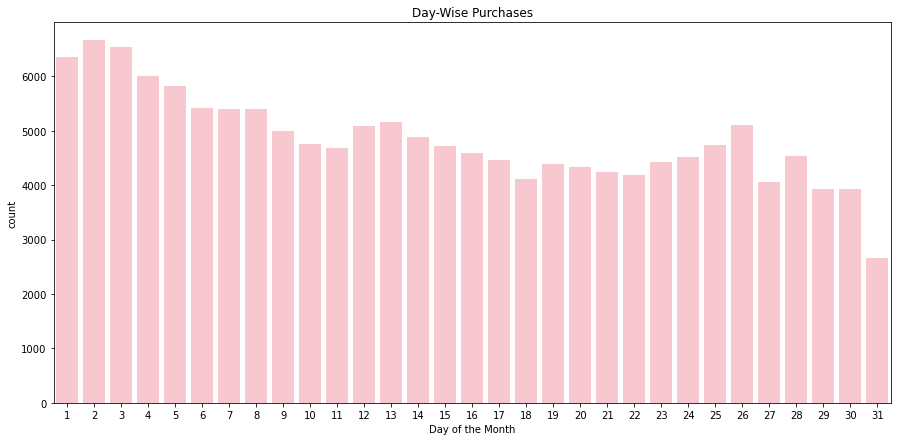

In [42]:
plt.figure(figsize=(15,7))
c= sns.countplot(x=df['transactionDate_x'].dt.day,color='pink').set(title='Day-Wise Purchases',xlabel='Day of the Month')

1. Maximum footfall of customers is seen during the first week of every month.
2. Increasing footfall is again observed during last week of the Month

Text(0.5, 0, 'Month')

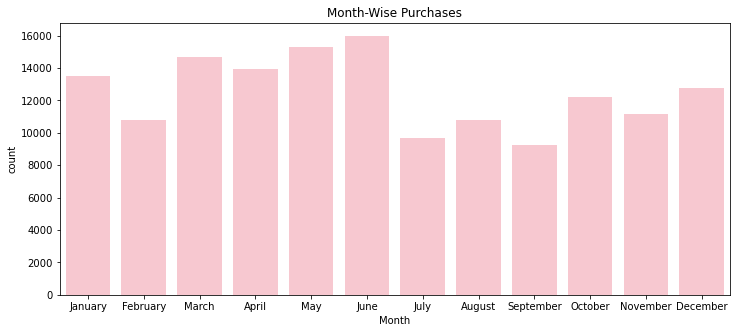

In [45]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['transactionDate_x'].dt.month,color='pink')
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])
ax.set_title('Month-Wise Purchases')
ax.set_xlabel('Month')

In [46]:
df.head(2)

,customerID,DOB_x,Gender_x,State_x,PinCode_x,transactionDate_x,store_code_x,store_description_x,till_no_x,tender_type,...,payment_amount_by_tender,PaymentUsed,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,Age,Promo_Type
0,BBID_2044,1984-04-02,male,Other,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,...,1000.00,Voucher,NaN,NaN,NaN,NaN,NaN,NaN,33,PROMO
1,BBID_2044,1984-04-02,male,Other,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,...,10.46,CASH,NaN,NaN,NaN,NaN,NaN,NaN,33,PROMO


1. January, May and June appear to be the months of maximum Customer footfall 

<AxesSubplot:ylabel='sale_price_after_promo'>

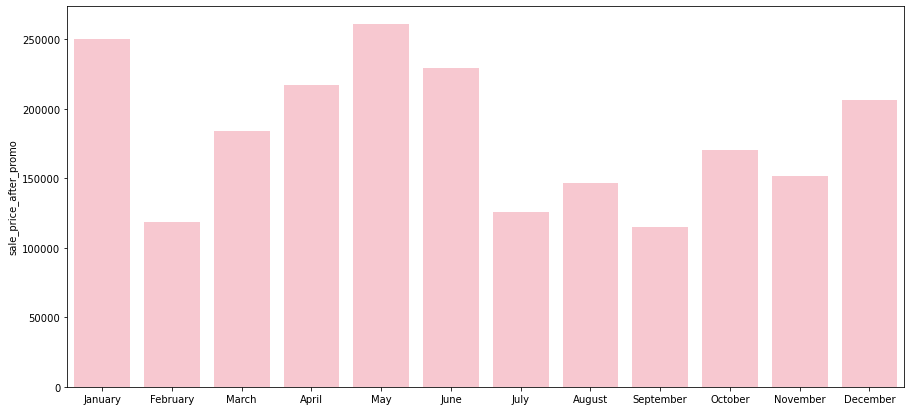

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x=['January','February','March','April','May','June','July','August','September','October','November','December'],color='pink',y=df['sale_price_after_promo'].groupby(df['transactionDate_x'].dt.month).sum())

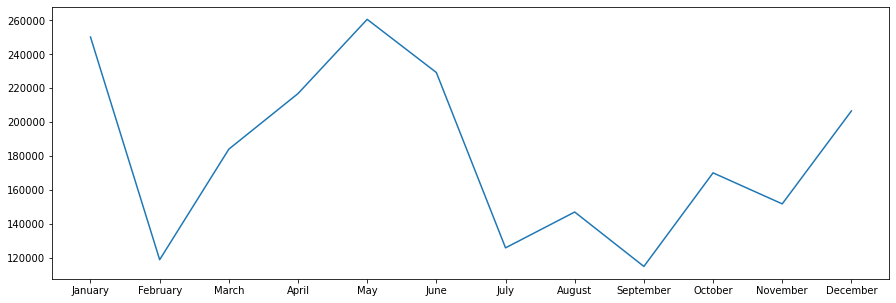

In [48]:
plt.figure(figsize=(15,5))
ax = plt.plot(['January','February','March','April','May','June','July','August','September','October','November','December'],df['sale_price_after_promo'].groupby(df['transactionDate_x'].dt.month).sum())


In [51]:
df['sale_price_after_promo'].groupby(df['transactionDate_x'].dt.month).sum()

transactionDate_x
1     250195.72
2     118747.87
3     184020.14
4     216821.22
5     260638.24
6     229258.85
7     125749.86
8     146901.66
9     114771.45
10    170016.18
11    151707.02
12    206552.94
Name: sale_price_after_promo, dtype: float64

In [52]:
def Assign_AgeInterval(x):
    if 9<=x<29:
        return("(9,29)")
    elif 29<=x<49:
        return("(29,49)")
    elif 49<=x<68:
        return("(49,68)")
    elif 68<=x<88:
        return("(68,88)")
    else:
        return("(88,108)")
df['Age_Interval'] = df['Age'].apply(Assign_AgeInterval)  

<AxesSubplot:xlabel='Promo_Type', ylabel='count'>

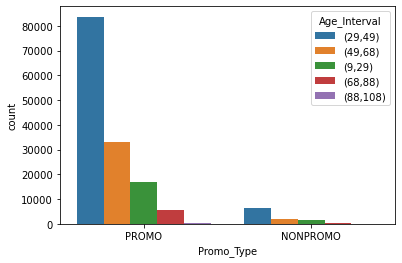

In [53]:
sns.countplot(x=df['Promo_Type'],hue=df['Age_Interval'])

1. Adults are the maximum among those who prefer to use/ not use the Promo 

<AxesSubplot:xlabel='PaymentUsed', ylabel='count'>

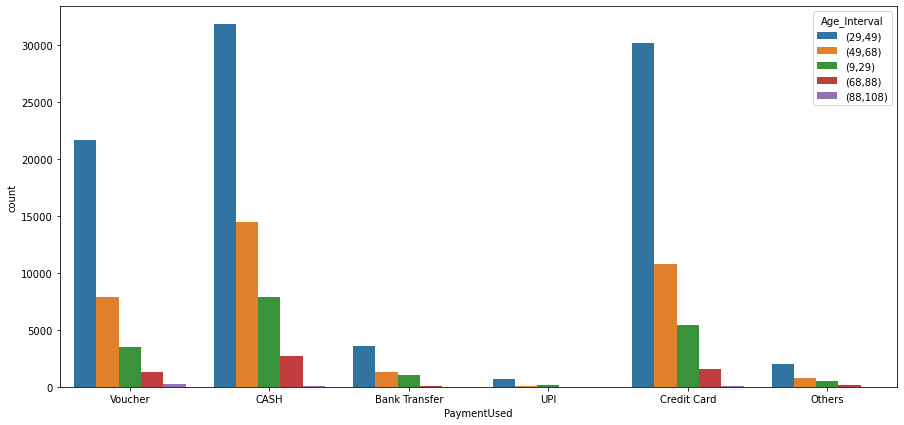

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(x='PaymentUsed',hue = 'Age_Interval',data = df)

1. Old customers prefer Cash over Credit Card while purchasing.
2. While adult customers are paying by cash credit card vouvher anything(ye line bana liyo)

In [40]:
df.columns

Index(['customerID', 'DOB_x', 'Gender_x', 'State_x', 'PinCode_x',
       'transactionDate_x', 'store_code_x', 'store_description_x', 'till_no_x',
       'tender_type', 'transaction_number_by_till', 'payment_amount_by_tender',
       'PaymentUsed', 'promo_code', 'promotion_description', 'product_code',
       'product_description', 'sale_price_after_discount', 'discountUsed'],
      dtype='object')

RFM Analysis

In [55]:
#Recency
df['Recency']=df['transactionDate_x'].max()-df['transactionDate_x']
df['Recency'] = df['Recency'].dt.days + 1
Recency = df.groupby(by ='customerID',as_index = False)['Recency'].min()
Recency.head()

,customerID,Recency
0,BBID_204100102,416
1,BBID_204100150,409
2,BBID_204100277,422
3,BBID_204100310,428
4,BBID_204100325,609


In [45]:
#Frequency
Frequency = df.groupby(by ='customerID',as_index = False)['transaction_number_by_till'].nunique()
Frequency.columns = ['customerID','Frequency']
Frequency.sort_values(by = 'customerID').head()

,customerID,Frequency
0,BBID_204100102,7
1,BBID_204100150,40
2,BBID_204100277,13
3,BBID_204100310,9
4,BBID_204100325,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149989 entries, 0 to 149988
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customerID                  149989 non-null  object        
 1   DOB_x                       145344 non-null  datetime64[ns]
 2   Gender_x                    143308 non-null  object        
 3   State_x                     149989 non-null  object        
 4   PinCode_x                   144409 non-null  float64       
 5   transactionDate_x           149989 non-null  datetime64[ns]
 6   store_code_x                149989 non-null  int64         
 7   store_description_x         149989 non-null  object        
 8   till_no_x                   149989 non-null  int64         
 9   tender_type                 149989 non-null  object        
 10  transaction_number_by_till  149989 non-null  int64         
 11  payment_amount_by_tender    149989 non-

In [58]:
Frequency = Purchase.groupby(by ='customerID',as_index = False)

In [60]:
Frequency['customerID'].count()

,customerID
0,1
1,1
2,1
3,1
4,2
...,...
10405,1
10406,1
10407,1
10408,1


In [46]:
#Monetary
Monetary = df.groupby(by ='customerID',as_index = False)['payment_amount_by_tender'].sum()
Monetary.columns = ['customerID','Monetary']
Monetary.head()

,customerID,Monetary
0,BBID_204100102,20820.32
1,BBID_204100150,17390.13
2,BBID_204100277,23573.19
3,BBID_204100310,19626.70
4,BBID_204100325,1060.01


In [47]:
Monetary.sort_values(['Monetary'],ascending=False)

,customerID,Monetary
5780,BBID_211414981,3249709.48
6191,BBID_211419317,2908563.15
2670,BBID_20453330,1292225.67
6405,BBID_211421442,843238.85
2506,BBID_20450543,521934.62
...,...,...
1860,BBID_20437627,50.00
2613,BBID_20452418,47.50
7625,BBID_211437976,40.00
3391,BBID_20469332,21.15


In [88]:
df[df['customerID']=='BBID_20493436']['payment_amount_by_tender']

79363    1878.15
79364    7076.50
79365    2548.25
79366    1000.00
79367     500.00
79368      14.21
79369    2916.00
79370    1500.00
79371     357.01
79372     376.27
79373    1000.00
79374    1657.00
Name: payment_amount_by_tender, dtype: float64

In [48]:
RFM_df = pd.merge(Recency,Frequency,on='customerID',how='inner')
RFM_df = pd.merge(RFM_df,Monetary,on='customerID',how='inner')

In [50]:
RFM_df.describe()

,Recency,Frequency,Monetary
count,9380.000000,9380.000000,9.380000e+03
mean,150.122708,12.571429,2.428173e+04
std,174.829599,17.321669,5.613558e+04
min,1.000000,1.000000,1.000000e+00
25%,24.000000,3.000000,6.469132e+03
50%,82.000000,7.000000,1.448711e+04
75%,212.000000,15.000000,2.944851e+04
max,792.000000,389.000000,3.249709e+06


KMeans Clustering

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
RFM_Normalised = scaler.fit_transform(RFM_df.drop('customerID',axis = 1))

In [52]:
RFM_Normalised

array([[0.52465234, 0.01546392, 0.00640652],
       [0.51580278, 0.10051546, 0.00535098],
       [0.53223767, 0.03092784, 0.00725363],
       ...,
       [0.04551201, 0.00515464, 0.00159157],
       [0.12262958, 0.01546392, 0.01166798],
       [0.02402023, 0.0128866 , 0.00262974]])

In [53]:
RFM_Normalised.shape

(9380, 3)

In [54]:
RFM_Normalised = pd.DataFrame(RFM_Normalised)
RFM_Normalised.columns = ['Recency','Frequency','Monetary']

In [55]:
RFM_Normalised.head()

,Recency,Frequency,Monetary
0,0.524652,0.015464,0.006407
1,0.515803,0.100515,0.005351
2,0.532238,0.030928,0.007254
3,0.539823,0.020619,0.006039
4,0.768647,0.000000,0.000326


In [56]:
from sklearn.cluster import KMeans

In [57]:
#Within Cluster Sum Of Squares WCSS
error = []
for k in range(2,15):
    knn = KMeans(n_clusters=k)
    knn.fit(RFM_Normalised)
    error.append(knn.inertia_)

Text(0.5, 0, 'Number of Clusters')

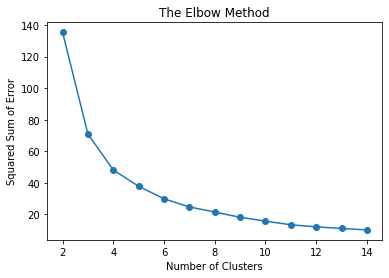

In [58]:
plt.plot(range(2,15),error,marker = 'o')
plt.title('The Elbow Method')
plt.ylabel("Squared Sum of Error")
plt.xlabel('Number of Clusters')

In [59]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(RFM_Normalised)

In [60]:
RFM_Normalised['Cluster'] = labels

In [61]:
RFM_df['Cluster_Label'] = kmeans.labels_
RFM_df['Cluster_Label'].value_counts()

0    4205
4    2326
1    1292
3     908
2     649
Name: Cluster_Label, dtype: int64

In [62]:
centroids = np.array(kmeans.cluster_centers_)
centroids

array([[0.02928395, 0.0442447 , 0.00996462],
       [0.29112848, 0.01811288, 0.00528058],
       [0.77971946, 0.00536908, 0.00239044],
       [0.49669186, 0.01426325, 0.00450502],
       [0.13314839, 0.02332249, 0.0067843 ]])

In [63]:
label0 = RFM_df[RFM_df['Cluster_Label']==0]
label1 = RFM_df[RFM_df['Cluster_Label']==1]
label2 = RFM_df[RFM_df['Cluster_Label']==2]
label3 = RFM_df[RFM_df['Cluster_Label']==3]
label4 = RFM_df[RFM_df['Cluster_Label']==4]

In [64]:
RFM_df

,customerID,Recency,Frequency,Monetary,Cluster_Label
0,BBID_204100102,416,7,20820.32,3
1,BBID_204100150,409,40,17390.13,3
2,BBID_204100277,422,13,23573.19,3
3,BBID_204100310,428,9,19626.70,3
4,BBID_204100325,609,1,1060.01,2
...,...,...,...,...,...
9375,BBID_21149949,379,3,2109.25,3
9376,BBID_21149960,15,4,3606.33,0
9377,BBID_21149962,37,3,5173.13,0
9378,BBID_21149963,98,7,37918.54,4


(-1500.0, 15000.0)

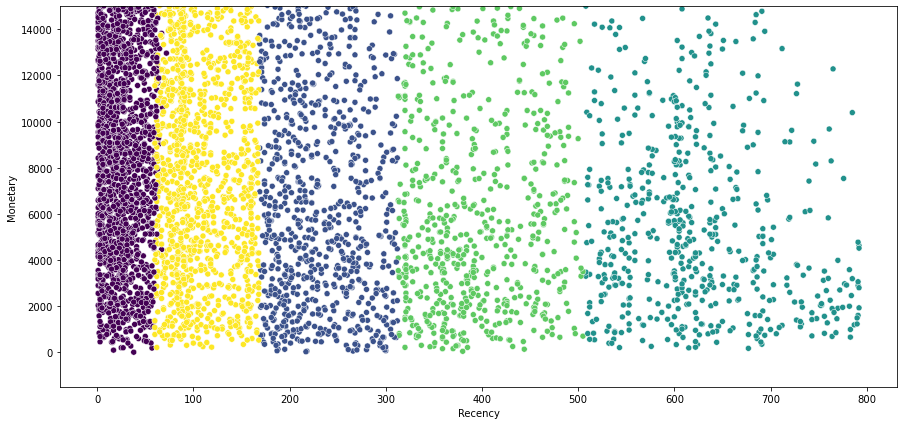

In [65]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=RFM_df['Recency'],y=RFM_df['Monetary'],c=RFM_df['Cluster_Label'])
plt.ylim(-1500,15000)

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

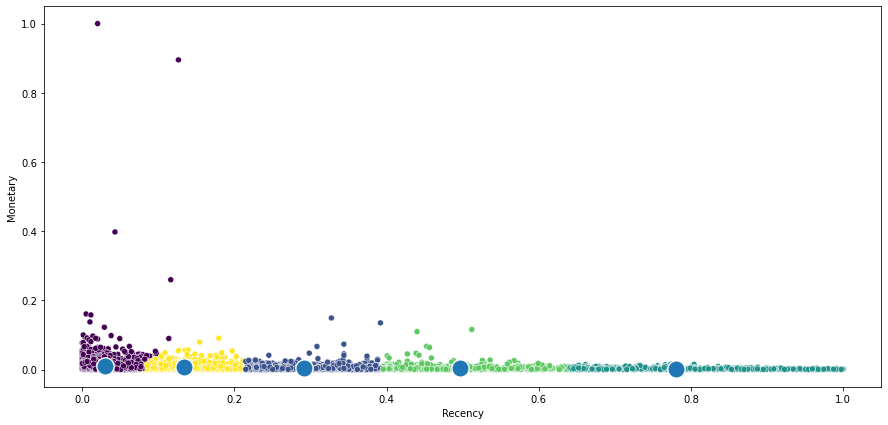

In [66]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=RFM_Normalised['Recency'],y=RFM_Normalised['Monetary'],c=RFM_Normalised['Cluster'])
sns.scatterplot(centroids[:,0],centroids[:,2],s=300)

([<matplotlib.patches.Wedge at 0x1995fbc37c0>,
 [Text(1.0741157548463718, 0.23722425084887266, 'Cluster 4'),
  Text(0.8131725632533029, 0.7407768775900428, 'Cluster 1'),
  Text(0.10447276287912637, 1.0950275986551217, 'Cluster 2'),
  Text(-0.9884939112321774, 0.4825761986017464, 'Cluster 0'),
  Text(0.1778974815236706, -1.085519454485978, 'Cluster 3')])

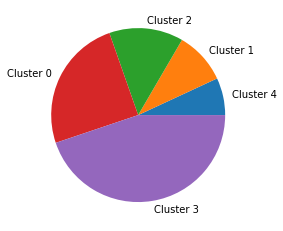

In [67]:
plt.pie(RFM_Normalised['Cluster'].value_counts().sort_values(),labels=['Cluster 4','Cluster 1','Cluster 2','Cluster 0','Cluster 3'])

In [68]:
RFM_Normalised['Cluster'].value_counts()

0    4205
4    2326
1    1292
3     908
2     649
Name: Cluster, dtype: int64

Cluster Characteristics

In [69]:
print("Cluster 0")
print(label0.describe()[1:2])
print("Cluster 1")
print(label1.describe()[1:2])
print("Cluster 2")
print(label2.describe()[1:2])
print("Cluster 3")
print(label3.describe()[1:2])
print("Cluster 4")
print(label4.describe()[1:2])

Cluster 0
        Recency  Frequency      Monetary  Cluster_Label
mean  24.329845  18.128894  32311.602994            0.0
Cluster 1
         Recency  Frequency      Monetary  Cluster_Label
mean  231.429567   8.044118  17195.500178            1.0
Cluster 2
         Recency  Frequency     Monetary  Cluster_Label
mean  617.758089   3.083205  7769.242974            2.0
Cluster 3
        Recency  Frequency      Monetary  Cluster_Label
mean  393.88326   6.534141  14640.998348            3.0
Cluster 4
         Recency  Frequency      Monetary  Cluster_Label
mean  106.735168  10.043422  22072.008173            4.0


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

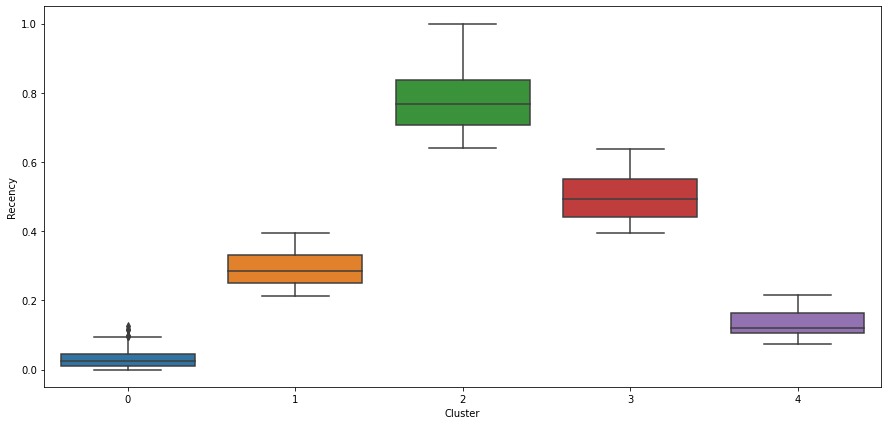

In [70]:
plt.figure(figsize=(15,7))
sns.boxplot(x=RFM_Normalised['Cluster'],y=RFM_Normalised['Recency'])

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

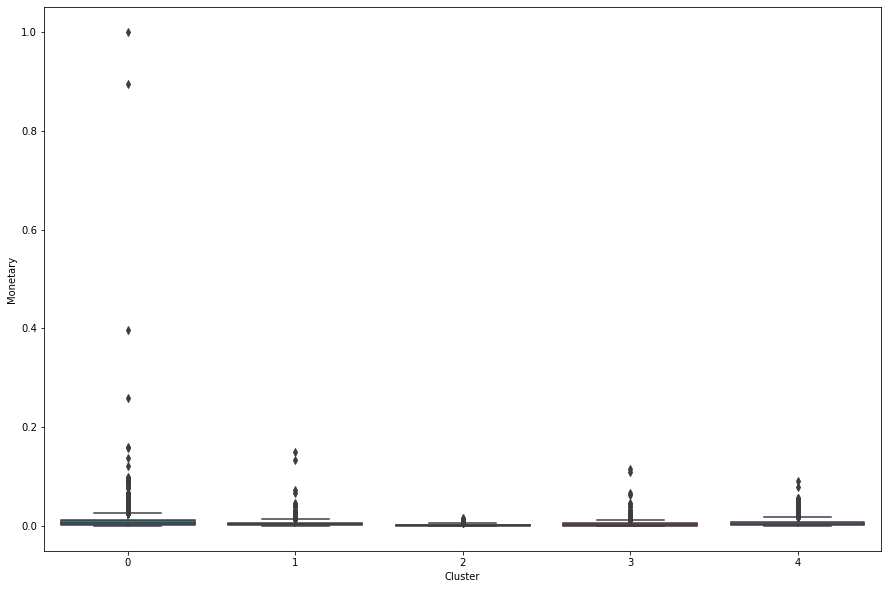

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(x=RFM_Normalised['Cluster'],y=RFM_Normalised['Monetary'])

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

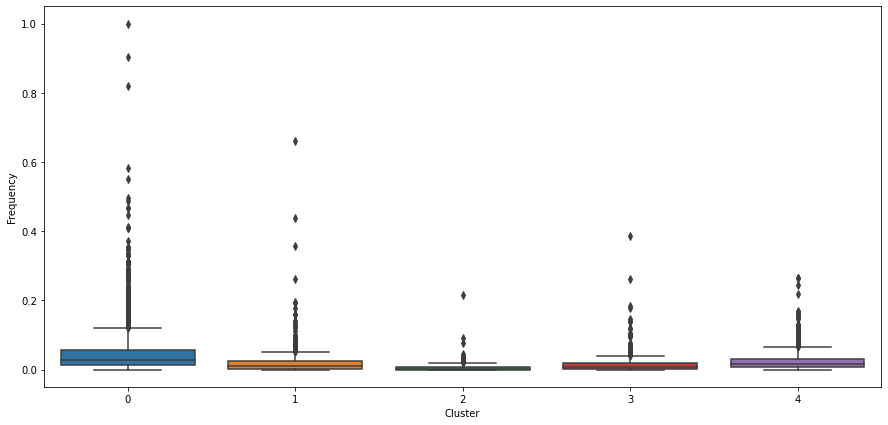

In [72]:
plt.figure(figsize=(15,7))
sns.boxplot(x=RFM_Normalised['Cluster'],y=RFM_Normalised['Frequency'])

SILHOUETTE SCORE

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
silhouette_avg = silhouette_score(RFM_Normalised,labels)

In [75]:
silhouette_avg

0.9367446924794608

In [76]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(RFM_Normalised)
    silhouette_avg = silhouette_score(RFM_Normalised,labels)
    print("Cluster={0}, Silhouette score ={1}".format(i,silhouette_avg))

Cluster=2, Silhouette score =0.7908027467246241
Cluster=3, Silhouette score =0.8183117083739817
Cluster=4, Silhouette score =0.8706505172951147
Cluster=5, Silhouette score =0.9367446924794608
Cluster=6, Silhouette score =0.806600143733748
Cluster=7, Silhouette score =0.7785226419802472
Cluster=8, Silhouette score =0.7761431217120245
Cluster=9, Silhouette score =0.7297290499784456


Thus 5 clusters are the best suitable number of clusters